# Il Dataset
Qua viene recuperato il dataset e vengono eseguiti gli import.

In altri diversi blocchi viene visualizzato il dataset.

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
%matplotlib inline

#import dataset
path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
df = pd.read_csv(path + "/updated_pollution_dataset.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.dtypes

,0
Temperature,float64
Humidity,float64
PM2.5,float64
PM10,float64
NO2,float64
SO2,float64
CO,float64
Proximity_to_Industrial_Areas,float64
Population_Density,int64
Air Quality,object


In [ ]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


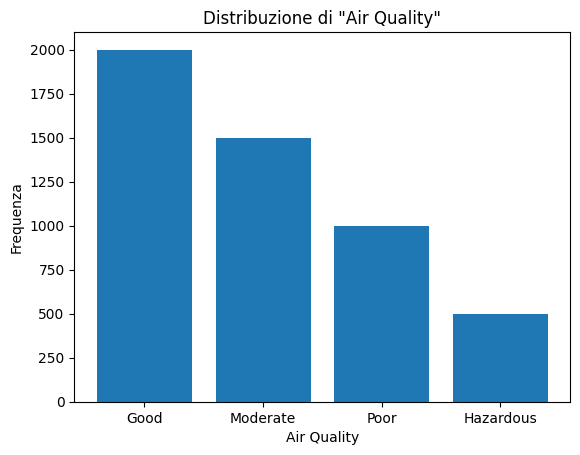

In [ ]:
#crea un grafico che mostra la frequenza delle diverse classi nella colonna target
plt.bar(["Good", "Moderate", "Poor", "Hazardous"], df["Air Quality"].value_counts())
plt.xlabel("Air Quality")
plt.ylabel("Frequenza")
plt.title("Distribuzione di \"Air Quality\"")
plt.xticks(["Good", "Moderate", "Poor", "Hazardous"])
plt.show()

In [ ]:
#funzione utilizzata per plottare la frequenza delle classi nella colonna target rispetto a 4 intervalli di valori di una feature specifica

def createBarChart(col_name):
    df_temp = pd.DataFrame()
    #gli intervalli sono determinati in base ai percentili
    bins = [0, df[col_name].quantile(0.25), df[col_name].quantile(0.50), df[col_name].quantile(0.75), float('inf')]
    df_temp[col_name + '_group'] = pd.cut(df[col_name], bins, labels=['Low', 'Med-Low', 'Med-high', 'High'])
    df_temp['Air Quality'] = df['Air Quality']
    grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)
    #ordina i bins e i colori ad essi associati
    grouped.reindex(["Hazardous","Poor","Moderate","Good"], axis=1).plot(kind='bar', color=["Red", "Orange", "Yellow", "Green"])
    plt.title('Grafico a barre di ' + col_name + ' Group e Air Quality')
    plt.xlabel(col_name + ' Group')
    plt.ylabel('Count')
    plt.legend(title='Air Quality', labels=["Hazardous","Poor","Moderate","Good"])
    plt.show()

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


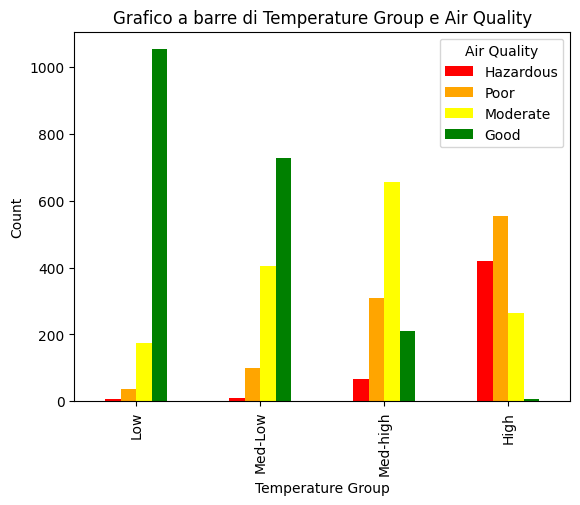

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


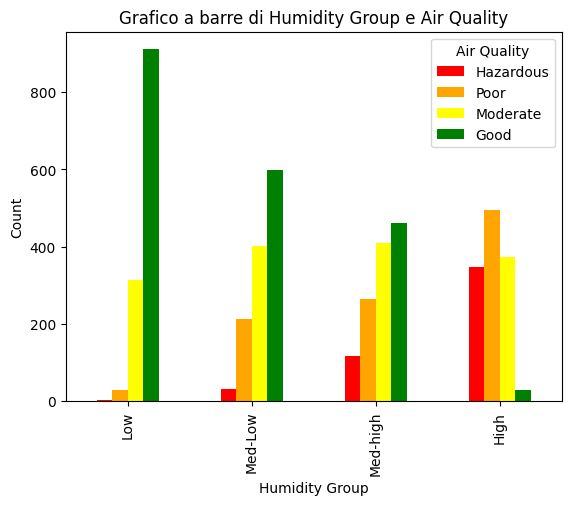

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


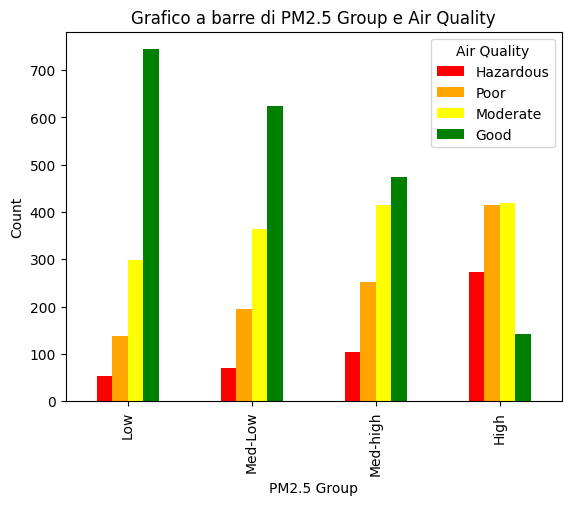

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


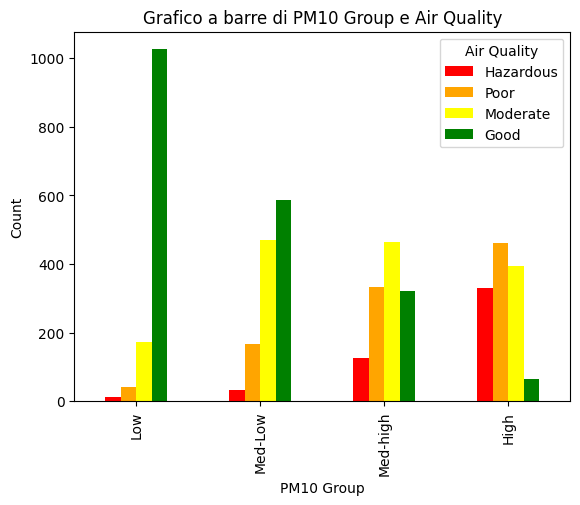

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


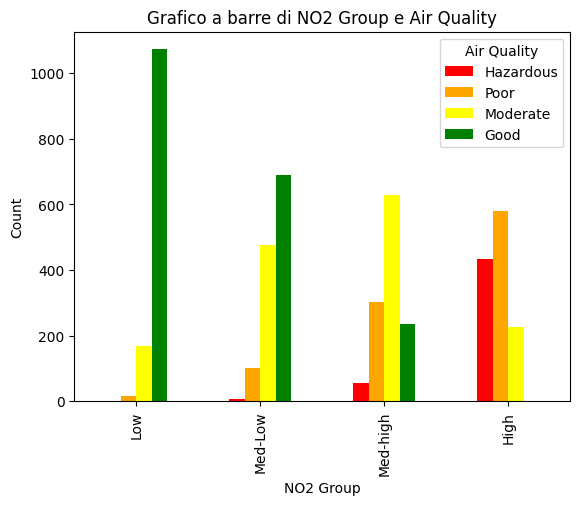

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


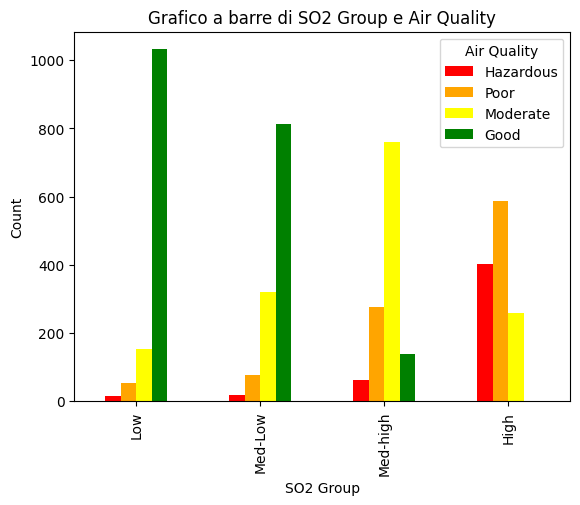

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


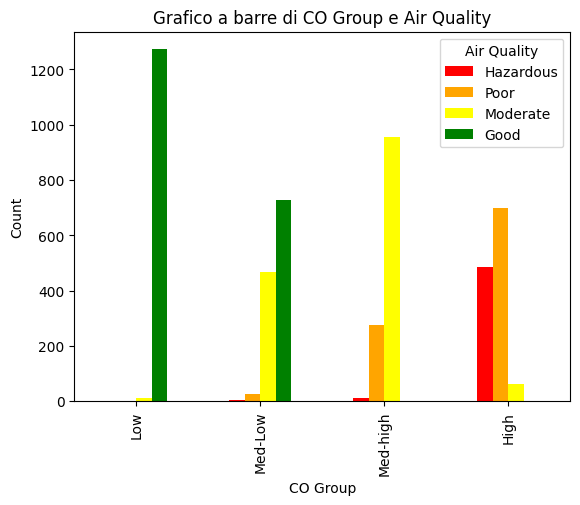

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


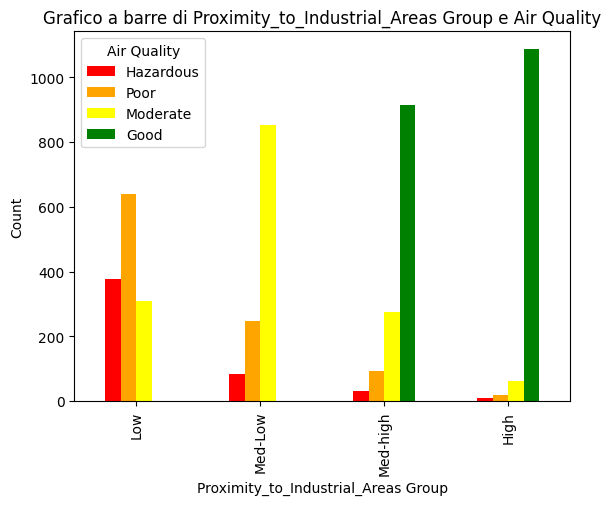

<ipython-input-52-fd8d5f6b6b85>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([col_name + '_group', 'Air Quality']).size().unstack(fill_value=0)


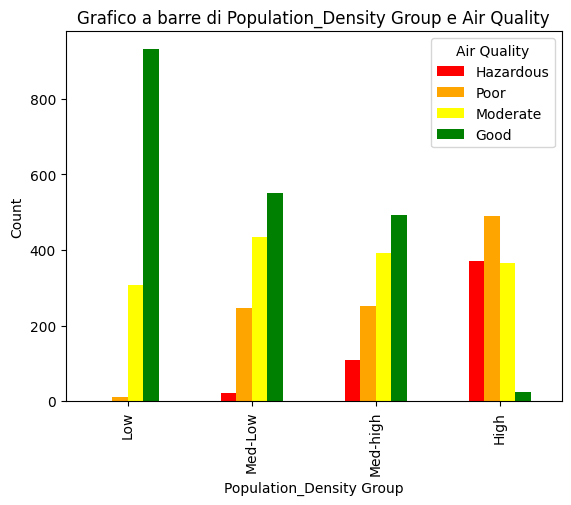

In [ ]:
for feature in df.columns:
  if feature == "Air Quality":
    break
  createBarChart(feature)

# PCA

In [ ]:
#viene utilizzato uno scaler per normalizzare tutti i valori tranne quelle della colonna target
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Air Quality'], axis=1))
scaled_data

array([[-0.03408041, -0.69071534, -0.60858932, ...,  0.40230264,
        -0.58865846, -1.16816284],
       [-0.25729505,  0.34950721, -0.72670554, ...,  0.25577499,
        -0.67174754,  0.74359753],
       [-1.03110581,  0.2927678 ,  0.26709986, ...,  0.23745904,
        -0.89331843,  0.79597453],
       ...,
       [-0.61443848,  0.51342107, -0.24202176, ...,  0.23745904,
         0.32532146, -0.77533537],
       [-0.70372434, -1.61745907,  0.0512323 , ..., -1.11792167,
         0.87924868, -1.67883856],
       [-0.88229605,  0.49450793,  2.50723499, ..., -0.22043985,
        -0.03473124, -0.23847116]])

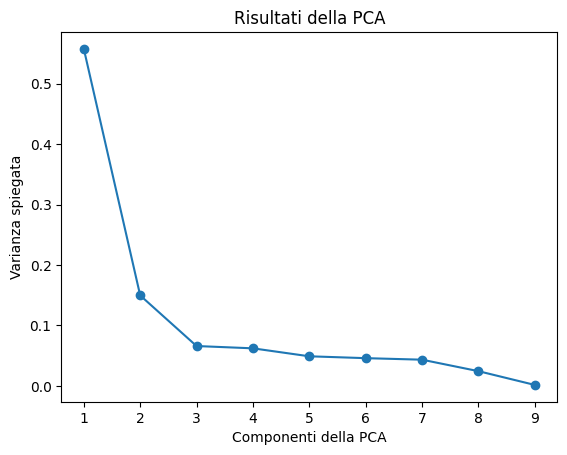

In [ ]:
pca = PCA().fit(scaled_data)

#crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [ ]:
#applica la PCA per ridurre il numero di feature prese in considerazione
pca = PCA(n_components=3).fit(scaled_data) #3 componenti
pca_data = pca.transform(scaled_data)
#stampa a video la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.55721851 0.14969909 0.06603658]


In [ ]:
#stampa a video le label della colonna Air Quality
np.unique(df["Air Quality"])

array(['Good', 'Hazardous', 'Moderate', 'Poor'], dtype=object)

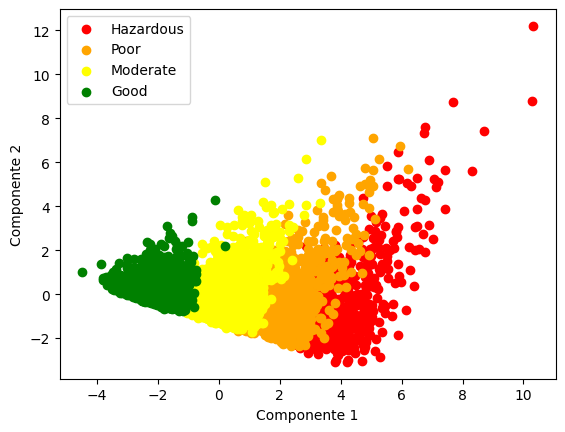

In [ ]:
#ogni label è associata ad un colore come segue:
labels = ["Hazardous", "Poor", "Moderate", "Good"]
colors = ["red", "orange", "yellow", "green"]

#disegnamo un grafico con i punti ottenuti con la PCA a 2 coordinate (prime 2 componenti)
fig, ax = plt.subplots()
i = 0
while i < len(labels):
    label = labels[i]
    mask = (df["Air Quality"] == label).values
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], color=colors[i], label=label)
    i = i + 1

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

ax.legend()

plt.show()

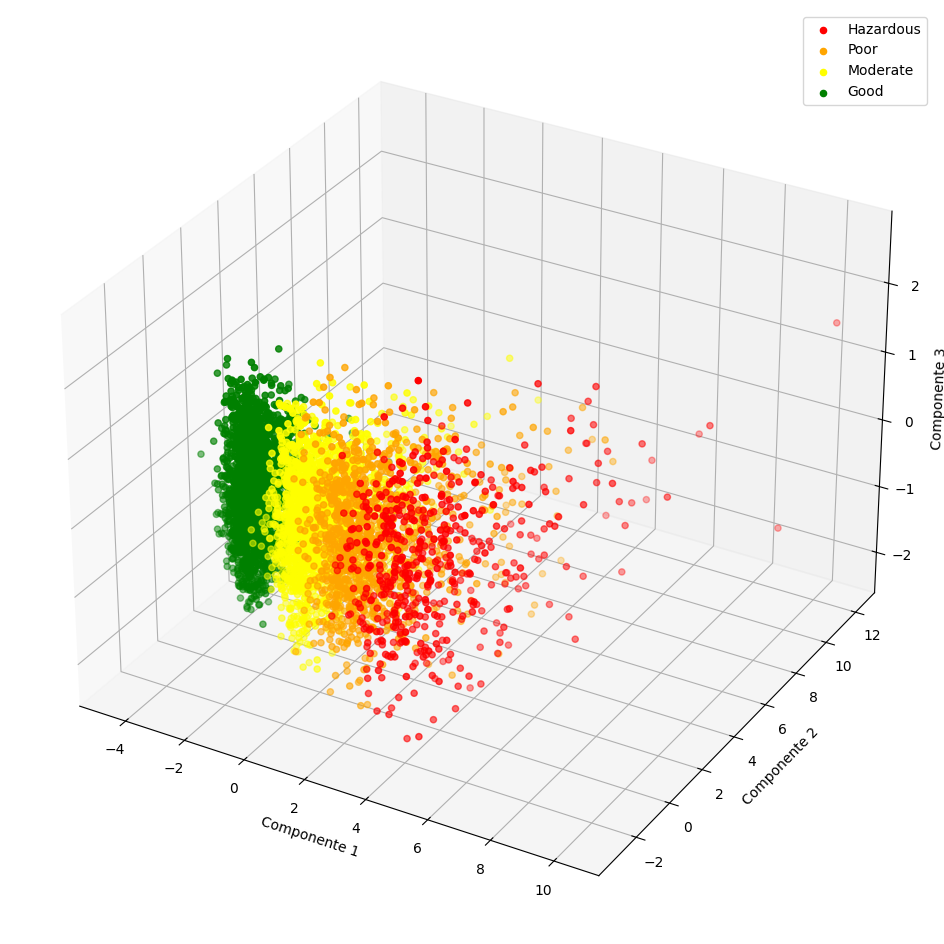

In [ ]:
#ogni label è associata ad un colore come segue:
labels = ["Hazardous", "Poor", "Moderate", "Good"]
colors = ["red", "orange", "yellow", "green"]

#disegnamo un grafico con i punti ottenuti con la PCA a 3 coordinate (prime 3 componenti)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
i = 0
while i < len(labels):
    label = labels[i]
    mask = (df["Air Quality"] == label).values
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], pca_data[mask, 2], color=colors[i], label=label)
    i = i + 1

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

ax.legend()

plt.show()

#Clustering

In [ ]:
#convertiamo le etichette in valori numerici da valori categorici
#newarr contiene tutte le features eccetto la colonna target
arr = df.to_numpy()
targets = np.array([0 for i in range(0, len(arr))])
newarr = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for i in range(0, len(arr))])
i = 0
for el in arr:
  newarr[i] = el[:9]
  i += 1
i = 0
for el in arr:
  if el[9] == 'Good':
    targets[i] = 0
  if el[9] == 'Moderate':
    targets[i] = 1
  if el[9] == 'Poor':
    targets[i] = 2
  if el[9] == 'Hazardous':
    targets[i] = 3
  i = i + 1

In [ ]:
#inizializzazione ed esecuzione di K-means
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(newarr)

In [ ]:
#calcolo e stampo il punteggio di silhouette medio
silhouette_avg =   silhouette_score(newarr, y_kmeans)
silhouette_avg

0.42127927273581256

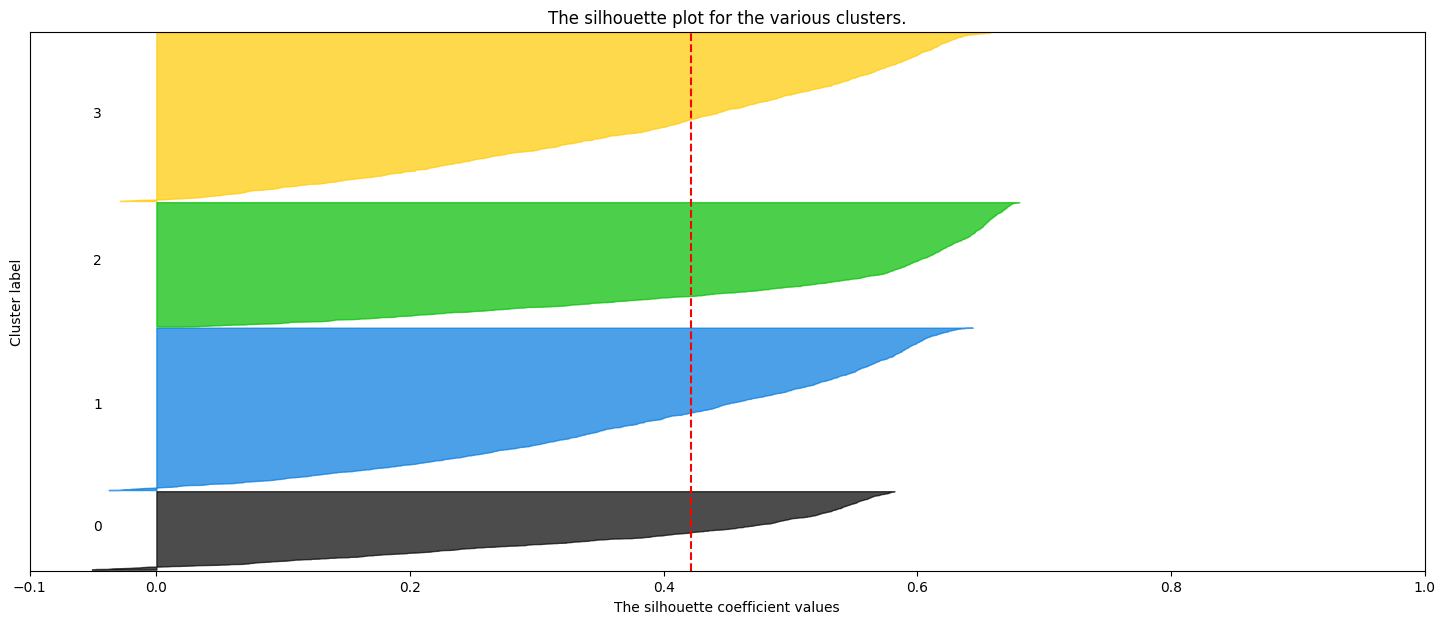

In [ ]:
n_clusters = 4

#creo un grafico
fig, (ax1) = plt.subplots()
fig.set_size_inches(18, 7)

#stampiamo il sottografo della silhouette
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(newarr) + (n_clusters + 1) * 10])

#computiamo il valore delle silhouette con ogni esempio
sample_silhouette_values = silhouette_samples(newarr, y_kmeans)

y_lower = 10
for i in range(n_clusters):
    #aggreghiamo i punteggi delle silhouette per gli esempi che appartengono al cluster i, e li ordiniamo
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    #etichettiamo i grafici delle silhouette con il rispettivo numero di cluster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#traccio una retta che rappresenta il punteggio di silhouette medio per tutti i valori
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

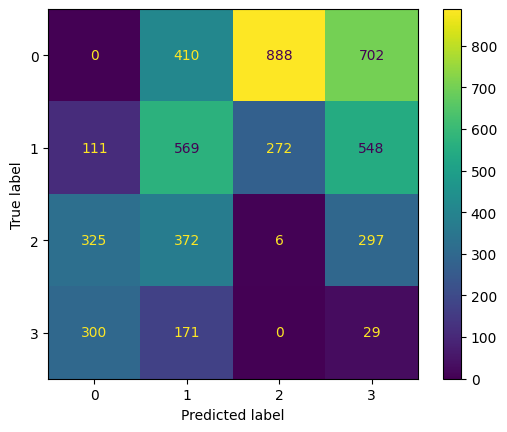

In [ ]:
#calcolo e stampo la matrice di confusione
matrix = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
for i in range(0, len(arr)):
  matrix[targets[i]][y_kmeans[i]] += 1

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1, 2, 3])
cm_display.plot()
plt.show()

In [ ]:
#stampiamo l'indice di rand per determinare la bontà del risultato del clustering
adjusted_rand_score(df["Air Quality"], y_kmeans)

0.11776114493578711

# Clustering su PCA-3

In [ ]:
#inizializzazione ed esecuzione di K-means sui dati PCA
pca_kmeans = KMeans(n_clusters=4, random_state=0)
pca_y_kmeans = pca_kmeans.fit_predict(pca_data)

In [ ]:
#calcolo e stampo il punteggio di silhouette medio
silhouette_avg = silhouette_score(pca_data, pca_y_kmeans)

For n_clusters = 4 The average silhouette_score is : 0.3985423661934031


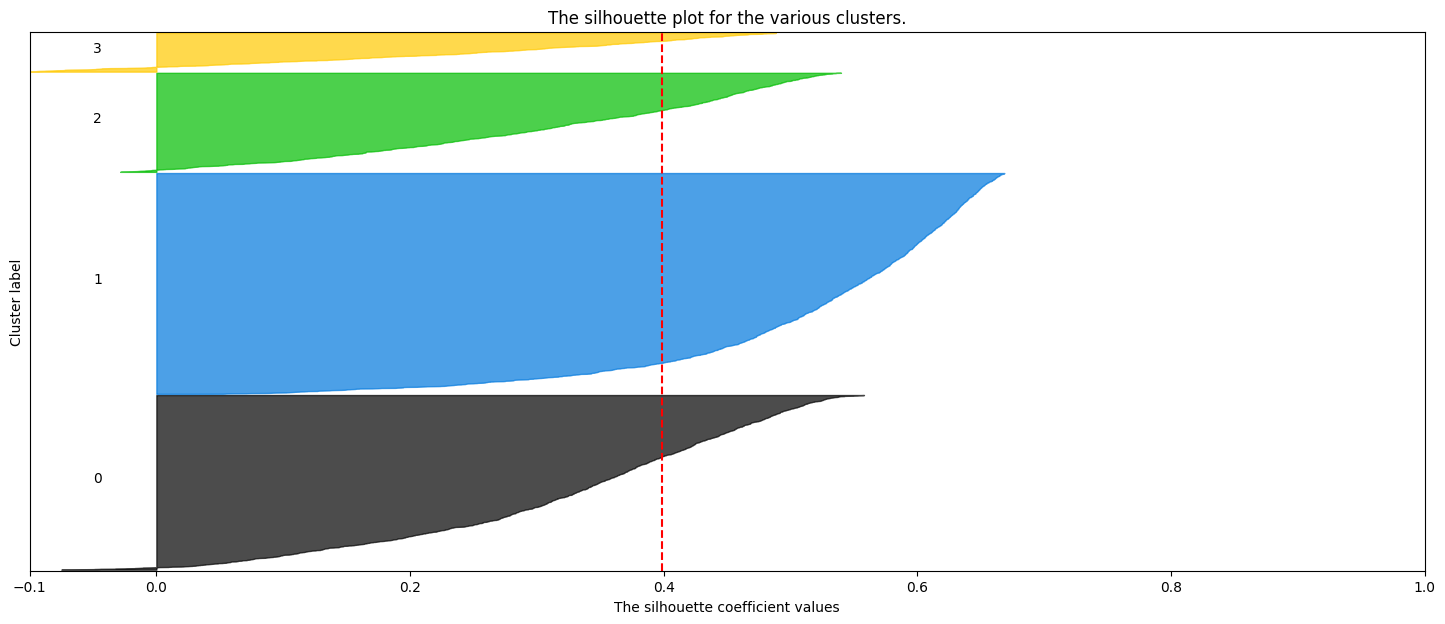

In [ ]:
n_clusters = 4

#creo un grafico
fig, (ax1) = plt.subplots()
fig.set_size_inches(18, 7)

#stampiamo il sottografo della silhouette
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])


silhouette_avg = silhouette_score(pca_data, pca_y_kmeans)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

#computiamo il valore delle silhouette con ogni esempio
sample_silhouette_values = silhouette_samples(pca_data, pca_y_kmeans)

y_lower = 10
for i in range(n_clusters):
    #aggreghiamo i punteggi delle silhouette per gli esempi che appartengono al cluster i, e li ordiniamo
    ith_cluster_silhouette_values = sample_silhouette_values[pca_y_kmeans == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    #etichettiamo i grafici delle silhouette con il rispettivo numero di cluster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#traccio una retta che rappresenta il punteggio di silhouette medio per tutti i valori
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

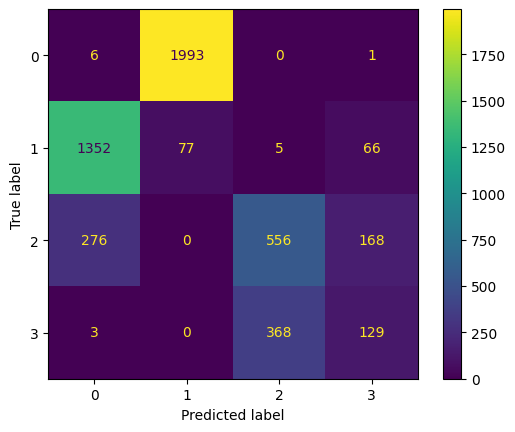

In [ ]:
#calcolo e stampo la matrice di confusione
new_matrix = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
for i in range(0, len(arr)):
  new_matrix[targets[i]][pca_y_kmeans[i]] += 1

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = new_matrix, display_labels = [0, 1, 2, 3])
cm_display.plot()
plt.show()

In [ ]:
#stampiamo l'indice di rand per determinare la bontà del risultato del clustering
adjusted_rand_score(df["Air Quality"], pca_y_kmeans)

0.7463894274920484

# Modelli di Classificazione

## SVM

Number of support vectors: 628
Accuratezza: 0.942


              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       411
   Hazardous       0.87      0.79      0.83       106
    Moderate       0.95      0.97      0.96       295
        Poor       0.85      0.86      0.85       188

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000



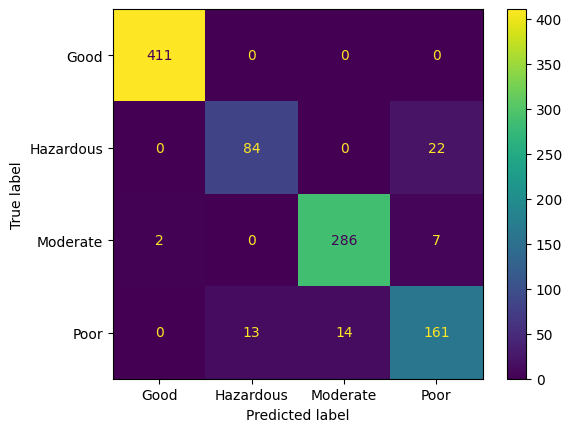

In [ ]:
#dividiamo i dati in insiemi di training e di test
X_train, X_test, y_train, y_test = train_test_split(newarr, df["Air Quality"], test_size=0.2, random_state=0)

clf = svm.SVC(kernel='linear', random_state=42, C=1)

clf.fit(X_train, y_train)

print(f"Number of support vectors: {clf.support_vectors_.shape[0]}")


#effettua le predizioni sul test set
y_pred_SVM = clf.predict(X_test)

#calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred_SVM)

print(f"Accuratezza: {accuracy}\n\n")
#stampiamo sia il classification report che la matrice di confusione
print(classification_report(y_test, y_pred_SVM))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_SVM), display_labels = ["Good", "Hazardous", "Moderate", "Poor"])

cm_display.plot()
plt.show()

## SVM - PCA

Number of support vectors: 854
Accuratezza: 0.909


              precision    recall  f1-score   support

        Good       0.99      0.99      0.99       411
   Hazardous       0.87      0.75      0.80       106
    Moderate       0.91      0.92      0.91       295
        Poor       0.77      0.81      0.79       188

    accuracy                           0.91      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000



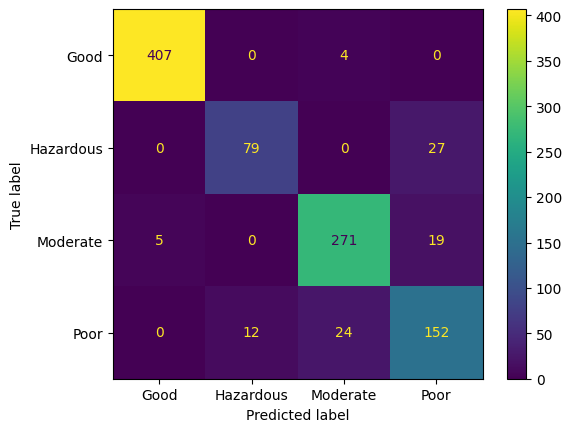

In [ ]:
#dividiamo i dati in insiemi di training e di test
X_train, X_test, y_train, y_test = train_test_split(pca_data[:, :2], df["Air Quality"], test_size=0.2, random_state=0)

clf = svm.SVC(kernel='linear', random_state=42, C=5)

clf.fit(X_train, y_train)

print(f"Number of support vectors: {clf.support_vectors_.shape[0]}")


#effettua le predizioni sul test set
y_pred_SVM_PCA = clf.predict(X_test)

#calcola l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred_SVM_PCA)

print(f"Accuratezza: {accuracy}\n\n")
#stampiamo sia il classification report che la matrice di confusione
print(classification_report(y_test, y_pred_SVM_PCA))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_SVM_PCA), display_labels = ["Good", "Hazardous", "Moderate", "Poor"])

cm_display.plot()
plt.show()

## Reti neurali

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


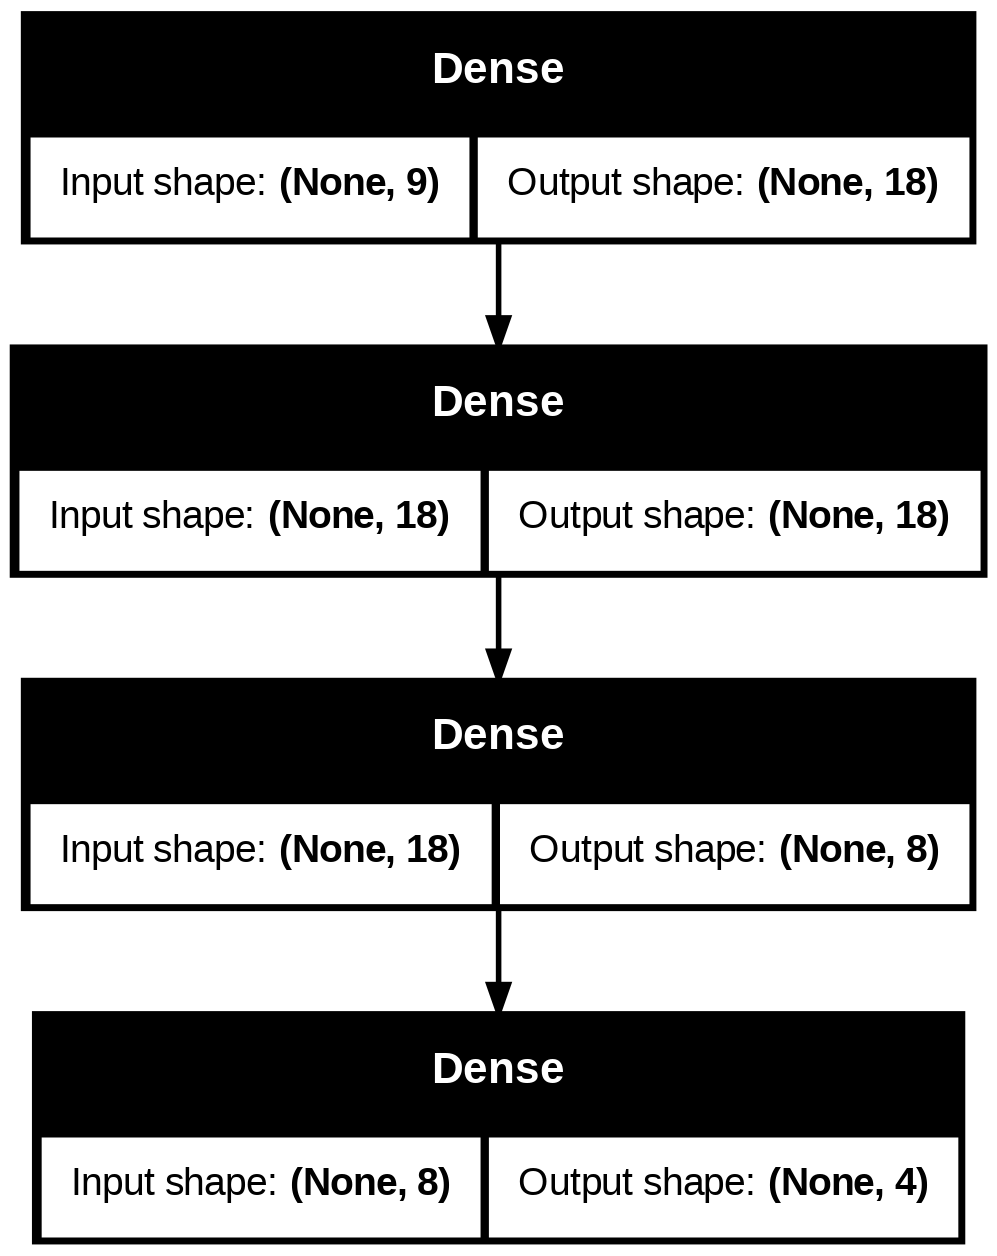

In [ ]:
model = Sequential()
#struttura della rete a strati (# di neuroni) 9 -> 18 -> 18 -> 8 -> 4
model.add(Dense(18, input_shape=(9,), activation='leaky_relu'))
model.add(Dense(18, input_shape=(18,), activation='leaky_relu'))
model.add(Dense(8, input_shape=(18,), activation='leaky_relu'))
model.add(Dense(4, input_shape=(8,), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary() #stampa numero di parametri

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 18)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 710 (2.77 KB)

 Trainable params: 710 (2.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#suddivisione dei dati tra train e test
X_train, X_test, y_train, y_test = train_test_split(newarr, targets, test_size=0.2, random_state=0)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
e = 0.0001
earlyStopping = EarlyStopping(monitor = "loss", min_delta = e,
    patience=3,          #attendi 3 epoche senza miglioramento prima di interrompere
    verbose=1,           #mostra messaggi di log
    mode='min',          #minimizza la perdita
    restore_best_weights=True  #ripristina i pesi della migliore epoca
)
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, callbacks = [earlyStopping])
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3511 - loss: 3.2581
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6248 - loss: 0.8961
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7022 - loss: 0.6602
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5692
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7657 - loss: 0.5247
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7662 - loss: 0.5545
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7777 - loss: 0.5322
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7951 - loss: 0.5020
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8074 - loss: 0.4766
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8077 - loss: 0.4588
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8059 - loss: 0.4529
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss'])


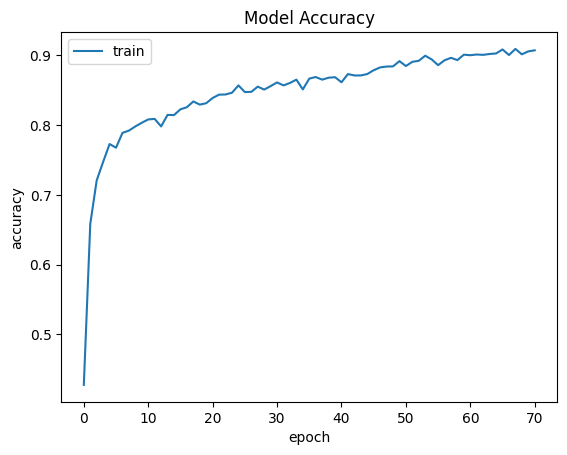

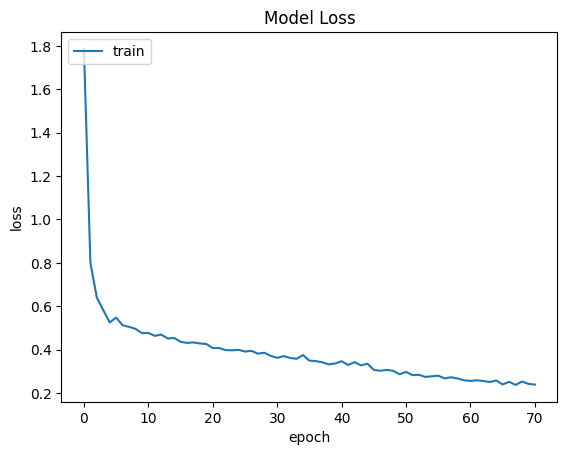

In [ ]:
#tracciamo i grafici per l'accuratezza e per la perdita
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#inferenza sui dati di test
y_pred_NN = model.predict(X_test)
y_pred_NN = np.argmax(y_pred_NN, axis = 1)
y_test_NN = np.argmax(y_test, axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuratezza: 0.926


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.98      0.93      0.95       295
           2       0.80      0.82      0.81       188
           3       0.76      0.81      0.79       106

    accuracy                           0.93      1000
   macro avg       0.88      0.89      0.89      1000
weighted avg       0.93      0.93      0.93      1000



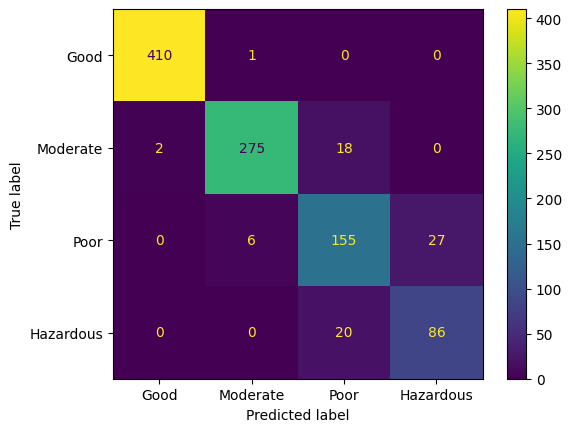

In [ ]:
#calcoliamo l'accuratezza del modello e stampiamo la matrice di confusione
accuracy = accuracy_score(y_test_NN, y_pred_NN)

print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test_NN, y_pred_NN))

result = metrics.confusion_matrix(y_test_NN, y_pred_NN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ["Good", "Moderate", "Poor", "Hazardous"])

cm_display.plot()
plt.show()

## Reti Neurali - PCA

In [ ]:
model = Sequential()
#struttura della rete a strati (# di neuroni) 3 -> 9 -> 6 -> 4
model.add(Dense(9, input_shape=(3,), activation='leaky_relu'))
model.add(Dense(6, input_shape=(9,), activation='leaky_relu'))
model.add(Dense(4, input_shape=(6,), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

X_train, X_test, y_train, y_test = train_test_split(pca_data, targets, test_size=0.2, random_state=0)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
e = 0.001
earlyStopping = EarlyStopping(monitor = "loss", min_delta = e,
    patience=3,          #attendi 3 epoche senza miglioramento prima di interrompere
    verbose=1,           #mostra messaggi di log
    mode='min',          #minimizza la perdita
    restore_best_weights=True  #ripristina i pesi della migliore epoca
)
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, callbacks = [earlyStopping])
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6330 - loss: 0.9370
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9011 - loss: 0.3459
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9093 - loss: 0.2684
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.2327
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9179 - loss: 0.2138
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9166 - loss: 0.2198
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9174 - loss: 0.2107
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9261 - loss: 0.2169
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9233 - loss: 0.2034
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9209 - loss: 0.2154
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9137 - loss: 0.2207
Epoch 11: early stopping
Restoring model 

dict_keys(['accuracy', 'loss'])


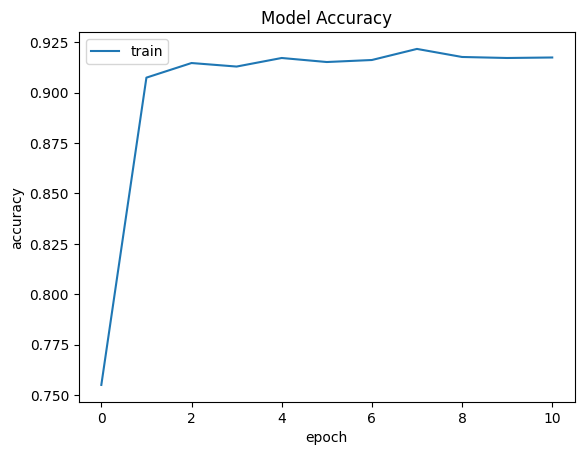

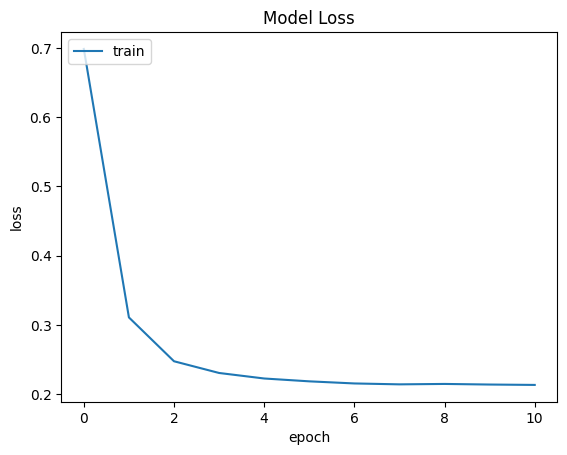

In [ ]:
#tracciamo i grafici per l'accuratezza e per la perdita
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#inferenza sui dati di test
y_pred_NN_PCA = model.predict(X_test)
y_pred_NN_PCA = np.argmax(y_pred_NN_PCA, axis = 1)
y_test_NN_PCA = np.argmax(y_test, axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuratezza: 0.912


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       0.92      0.92      0.92       295
           2       0.77      0.81      0.79       188
           3       0.84      0.75      0.79       106

    accuracy                           0.91      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000



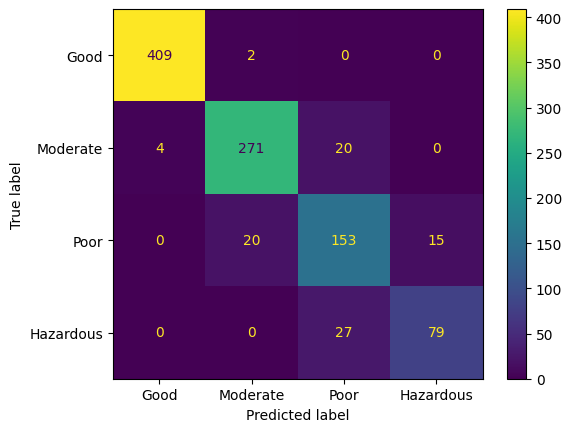

In [ ]:
#calcola l'accuratezza del modello e stampiamo la matrice di confusione
accuracy = accuracy_score(y_test_NN_PCA, y_pred_NN_PCA)

print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test_NN_PCA, y_pred_NN_PCA))

result = metrics.confusion_matrix(y_test_NN_PCA, y_pred_NN_PCA)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ["Good", "Moderate", "Poor", "Hazardous"])

cm_display.plot()
plt.show()

# Confronto curve roc

In [ ]:
y_test_SVM = y_test_NN
y_test_SVM_PCA = y_test_NN_PCA

In [ ]:
#convertiamo le etichette da categoriche a numeriche solo per SVM
i = 0
for el in y_pred_SVM:
  if el == 'Good':
    y_pred_SVM[i] = 0
  if el == 'Moderate':
    y_pred_SVM[i] = 1
  if el == 'Poor':
    y_pred_SVM[i] = 2
  if el == 'Hazardous':
    y_pred_SVM[i] = 3
  i = i + 1

i = 0
for el in y_pred_SVM_PCA:
  if el == 'Good':
    y_pred_SVM_PCA[i] = 0
  if el == 'Moderate':
    y_pred_SVM_PCA[i] = 1
  if el == 'Poor':
    y_pred_SVM_PCA[i] = 2
  if el == 'Hazardous':
    y_pred_SVM_PCA[i] = 3
  i = i + 1

Di seguito vengono calcolate e tracciate le curve ROC per le metodologie utilizzate per fare classificazione in questo ordine:
- SVM
- Reti Neurali

Per ogni metodologia è stato prima stampato il grafico sulla prediction senza usare PCA e poi è stato stampato il grafico sulla prediction che usa PCA.

Text(0, 0.5, 'TPR')

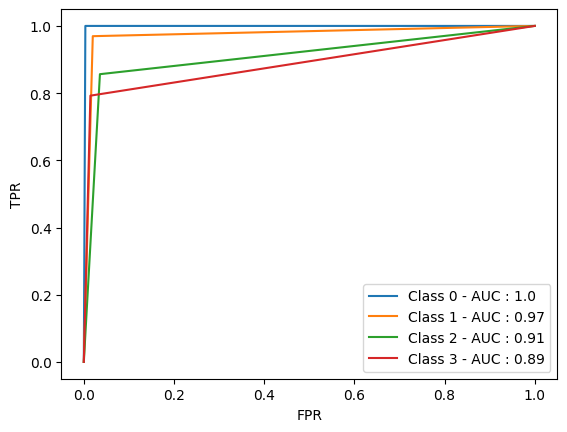

In [ ]:
n_classes = 4

tpr,fpr,roc_auc = ([[]]*n_classes for _ in range(3))

f,ax = plt.subplots()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_SVM==i, y_pred_SVM == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax.plot(fpr[i],tpr[i])
plt.legend(['Class ' + str(d) + ' - AUC : ' + str(round(roc_auc[d],2)) for d in range(n_classes)])
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

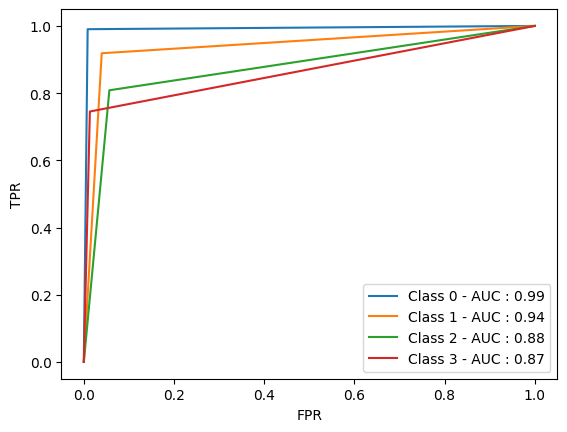

In [ ]:
n_classes = 4

tpr,fpr,roc_auc = ([[]]*n_classes for _ in range(3))

f,ax = plt.subplots()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_SVM_PCA==i, y_pred_SVM_PCA == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax.plot(fpr[i],tpr[i])
plt.legend(['Class ' + str(d) + ' - AUC : ' + str(round(roc_auc[d],2)) for d in range(n_classes)])
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

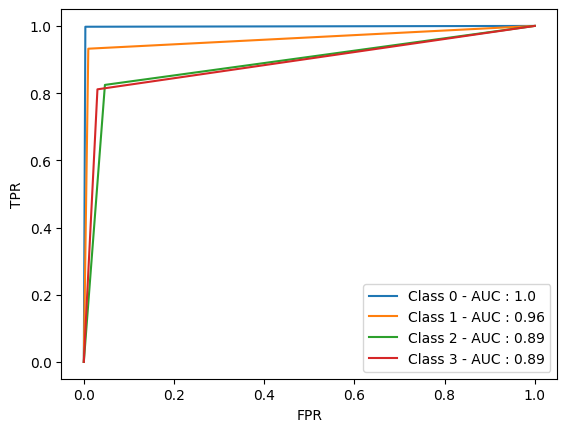

In [ ]:
n_classes = 4

tpr,fpr,roc_auc = ([[]]*n_classes for _ in range(3))

f,ax = plt.subplots()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_NN ==i, y_pred_NN == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax.plot(fpr[i],tpr[i])
plt.legend(['Class ' + str(d) + ' - AUC : ' + str(round(roc_auc[d],2)) for d in range(n_classes)])
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

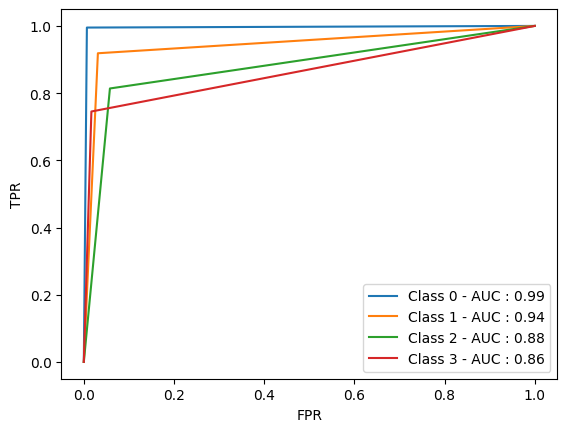

In [ ]:
n_classes = 4

tpr,fpr,roc_auc = ([[]]*n_classes for _ in range(3))

f,ax = plt.subplots()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_NN_PCA ==i, y_pred_NN_PCA == i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax.plot(fpr[i],tpr[i])
plt.legend(['Class ' + str(d) + ' - AUC : ' + str(round(roc_auc[d],2)) for d in range(n_classes)])
plt.xlabel('FPR')
plt.ylabel('TPR')